In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [42]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f921a495ac4362feb1ecbfeb0abb1b88


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f921a495ac4362feb1ecbfeb0abb1b88&q=Boston


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list. Use enumerate to get the index of the city for logging purposes and 
# the city for creating an endpoint URL

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | upernavik
Processing Record 4 of Set 1 | dwarka
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | jujuy
City not found. Skipping...
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | nanakuli
Processing Record 12 of Set 1 | marcona
City not found. Skipping...
Processing Record 13 of Set 1 | sisimiut
Processing Record 14 of Set 1 | oneida
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | ye
City not found. Skipping...
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | clyde river
Processing Record 21 of Set 1 | 

Processing Record 36 of Set 4 | tucuman
Processing Record 37 of Set 4 | sainte-maxime
Processing Record 38 of Set 4 | pinotepa nacional
Processing Record 39 of Set 4 | gazanjyk
Processing Record 40 of Set 4 | zaysan
Processing Record 41 of Set 4 | codrington
Processing Record 42 of Set 4 | kavieng
Processing Record 43 of Set 4 | katherine
Processing Record 44 of Set 4 | bilibino
Processing Record 45 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 46 of Set 4 | murindo
Processing Record 47 of Set 4 | pauini
Processing Record 48 of Set 4 | carnarvon
Processing Record 49 of Set 4 | georgetown
Processing Record 50 of Set 4 | puerto suarez
Processing Record 1 of Set 5 | sobolevo
Processing Record 2 of Set 5 | airai
Processing Record 3 of Set 5 | guicheng
City not found. Skipping...
Processing Record 4 of Set 5 | bay roberts
Processing Record 5 of Set 5 | dingle
Processing Record 6 of Set 5 | inhambane
Processing Record 7 of Set 5 | huntsville
Processing Record 8 of Set

Processing Record 21 of Set 8 | pacific grove
Processing Record 22 of Set 8 | zubtsov
Processing Record 23 of Set 8 | khammam
Processing Record 24 of Set 8 | yar-sale
Processing Record 25 of Set 8 | mondeville
Processing Record 26 of Set 8 | paragominas
Processing Record 27 of Set 8 | cabo san lucas
Processing Record 28 of Set 8 | saquena
Processing Record 29 of Set 8 | carayao
Processing Record 30 of Set 8 | novikovo
Processing Record 31 of Set 8 | garowe
Processing Record 32 of Set 8 | meulaboh
Processing Record 33 of Set 8 | grindavik
Processing Record 34 of Set 8 | bor
Processing Record 35 of Set 8 | margate
Processing Record 36 of Set 8 | grimari
City not found. Skipping...
Processing Record 37 of Set 8 | kaitangata
Processing Record 38 of Set 8 | lorengau
Processing Record 39 of Set 8 | miquelon
Processing Record 40 of Set 8 | flin flon
Processing Record 41 of Set 8 | douala
Processing Record 42 of Set 8 | atar
Processing Record 43 of Set 8 | mao
Processing Record 44 of Set 8 | s

Processing Record 14 of Set 12 | solovetskiy
City not found. Skipping...
Processing Record 15 of Set 12 | xining
Processing Record 16 of Set 12 | alice springs
Processing Record 17 of Set 12 | mahibadhoo
Processing Record 18 of Set 12 | uyskoye
Processing Record 19 of Set 12 | akhaldaba
Processing Record 20 of Set 12 | hauterive
Processing Record 21 of Set 12 | wajima
Processing Record 22 of Set 12 | gravdal
Processing Record 23 of Set 12 | ulaangom
Processing Record 24 of Set 12 | lasa
Processing Record 25 of Set 12 | abdanan
Processing Record 26 of Set 12 | olinda
Processing Record 27 of Set 12 | tacuarembo
Processing Record 28 of Set 12 | dunedin
Processing Record 29 of Set 12 | tuensang
Processing Record 30 of Set 12 | paamiut
Processing Record 31 of Set 12 | concarneau
Processing Record 32 of Set 12 | marawi
Processing Record 33 of Set 12 | hildburghausen
Processing Record 34 of Set 12 | manokwari
Processing Record 35 of Set 12 | tiznit
Processing Record 36 of Set 12 | dakar
Proce

In [19]:
len(city_data)

549

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.74,-90.35,69.01,92,24,7.49,EC,2020-06-23 03:26:12
1,Saint-Philippe,-21.36,55.77,64.40,82,48,5.82,RE,2020-06-23 03:26:12
2,Upernavik,72.79,-56.15,38.66,75,74,10.18,GL,2020-06-23 03:26:12
3,Dwarka,22.24,68.97,85.69,79,99,9.60,IN,2020-06-23 03:26:12
4,East London,-33.02,27.91,53.60,58,0,10.29,ZA,2020-06-23 03:26:13
5,Busselton,-33.65,115.33,62.01,79,27,4.00,AU,2020-06-23 03:25:58
6,Ushuaia,-54.80,-68.30,33.80,86,75,6.93,AR,2020-06-23 03:26:13
7,Atuona,-9.80,-139.03,79.84,76,20,13.96,PF,2020-06-23 03:26:13
8,Cape Town,-33.93,18.42,53.01,100,0,6.93,ZA,2020-06-23 03:26:14
9,Nanakuli,21.39,-158.15,84.20,54,90,13.87,US,2020-06-23 03:26:14


In [27]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
new_city_data_df=city_data_df[new_column_order]
new_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2020-06-23 03:26:12,-0.74,-90.35,69.01,92,24,7.49
1,Saint-Philippe,RE,2020-06-23 03:26:12,-21.36,55.77,64.40,82,48,5.82
2,Upernavik,GL,2020-06-23 03:26:12,72.79,-56.15,38.66,75,74,10.18
3,Dwarka,IN,2020-06-23 03:26:12,22.24,68.97,85.69,79,99,9.60
4,East London,ZA,2020-06-23 03:26:13,-33.02,27.91,53.60,58,0,10.29
5,Busselton,AU,2020-06-23 03:25:58,-33.65,115.33,62.01,79,27,4.00
6,Ushuaia,AR,2020-06-23 03:26:13,-54.80,-68.30,33.80,86,75,6.93
7,Atuona,PF,2020-06-23 03:26:13,-9.80,-139.03,79.84,76,20,13.96
8,Cape Town,ZA,2020-06-23 03:26:14,-33.93,18.42,53.01,100,0,6.93
9,Nanakuli,US,2020-06-23 03:26:14,21.39,-158.15,84.20,54,90,13.87


In [33]:
# Create the output file (CSV).
output_data_file = "/Users/markeia/OneDrive/Data Analytics Bootcamp/Python Module/World_Weather_Analysis/cities.csv"
# Export the City_Data into a CSV.
new_city_data_df.to_csv(output_data_file, index_label="City_ID")

In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = new_city_data_df["Lat"]
max_temps = new_city_data_df["Max Temp"]
humidity = new_city_data_df["Humidity"]
cloudiness = new_city_data_df["Cloudiness"]
wind_speed = new_city_data_df["Wind Speed"]

In [35]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1592885924.066206

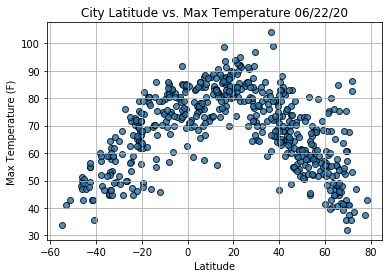

In [38]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("/Users/markeia/OneDrive/Data Analytics Bootcamp/Python Module/World_Weather_Analysis/Fig1.png")

# Show plot.
plt.show()

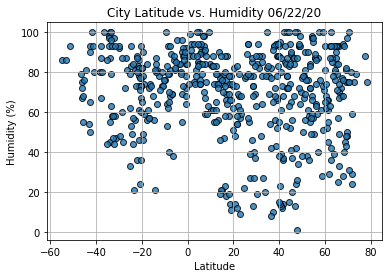

In [39]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("/Users/markeia/OneDrive/Data Analytics Bootcamp/Python Module/World_Weather_Analysis/Fig2.png")
# Show plot.
plt.show()

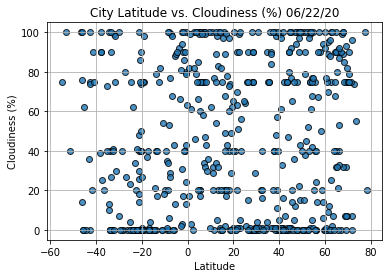

In [40]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("/Users/markeia/OneDrive/Data Analytics Bootcamp/Python Module/World_Weather_Analysis/Fig3.png")
# Show plot.
plt.show()

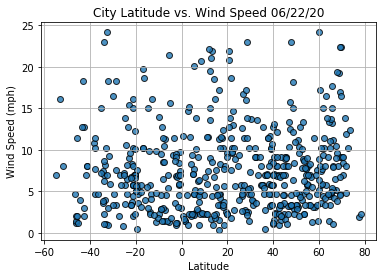

In [41]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("/Users/markeia/OneDrive/Data Analytics Bootcamp/Python Module/World_Weather_Analysis/Fig4.png")
# Show plot.
plt.show()